# GETTING STARTED

In [1]:
# Importing everything from utils
from utils import *

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Loading the data
df_sales = pd.read_csv('df_financial.csv', parse_dates=[0], usecols=[0,1], index_col='Date')

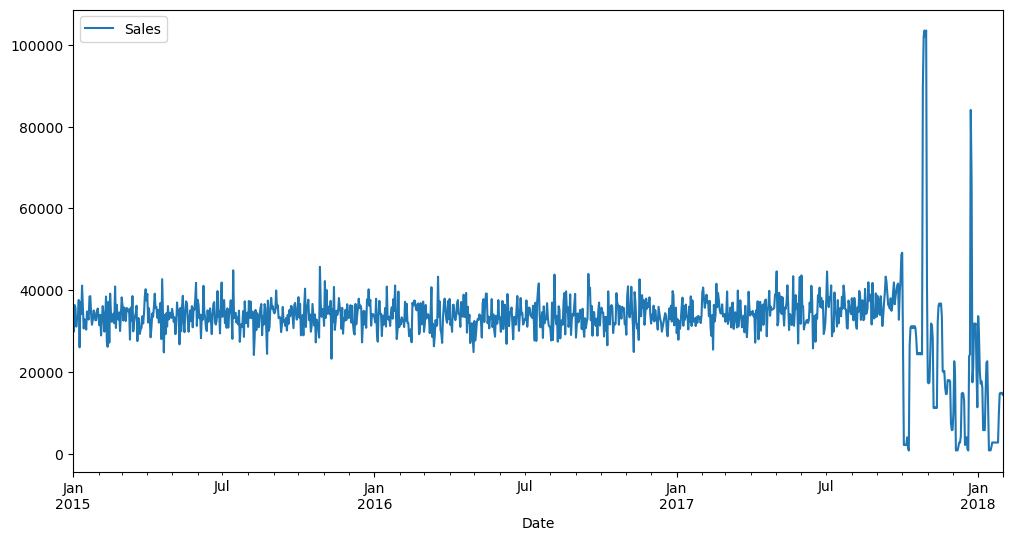

In [4]:
# Graphing Time Series data
df_sales.plot(figsize=(12,6))
plt.ticklabel_format(axis='y', style='plain')
plt.show()

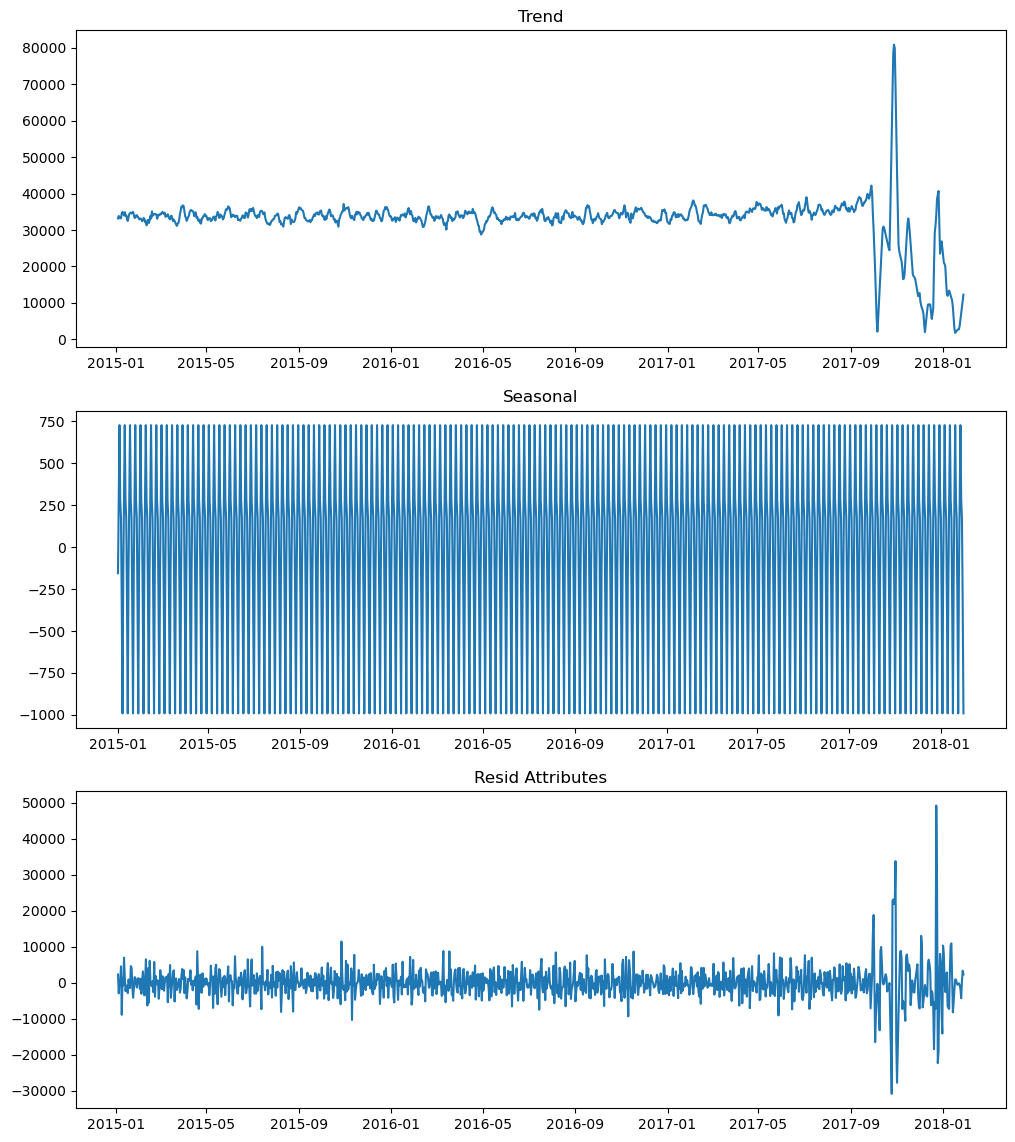

In [5]:
# Decomposing Times Series by Tren, Seasonal & Resid Attributes
season_analysis = seasonal_decompose(df_sales.Sales)


plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
plt.plot(season_analysis.trend)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Trend')

plt.subplot(3,1,2)
plt.plot(season_analysis.seasonal)
plt.title('Seasonal')

plt.subplot(3,1,3)
plt.plot(season_analysis.resid)
plt.title('Resid Attributes')
plt.show()

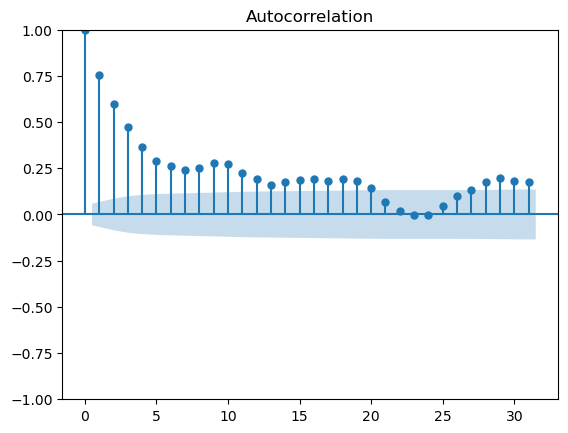

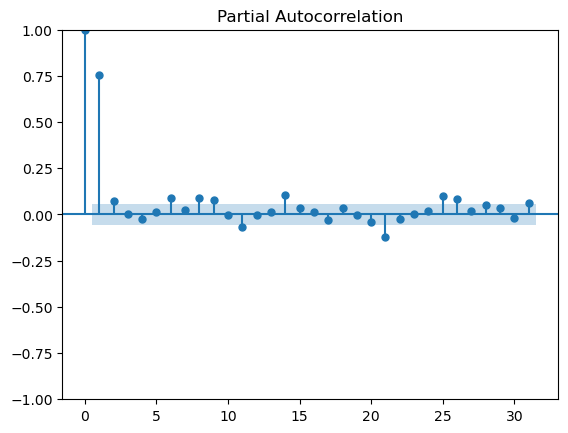

In [6]:
# Graphing Autocorrelation & Partial Autororrelation of Times Series
pm.plot_acf(df_sales, alpha=0.05)
pm.plot_pacf(df_sales, alpha=0.05);

# SARIMA MODEL

## Building SARIMA Model

In [7]:
# Auto Arima will helps on finding the best model with the least AIC
auto_arima_model = pm.auto_arima(
    df_sales, error_action='ignore', suppress_warnings=True, maxiter=20, seasonal=True, m=7)

# Sarima model (1,1,5)X(1,0,0,7) Summary
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1127
Model:             SARIMAX(1, 1, 5)x(1, 0, [], 7)   Log Likelihood              -11334.578
Date:                            Sun, 27 Nov 2022   AIC                          22685.155
Time:                                    20:39:50   BIC                          22725.367
Sample:                                01-01-2015   HQIC                         22700.350
                                     - 01-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3866      0.070      5.496      0.000       0.249       0.524
ma.L1         -0.7070      0.074     -9.504      0.000      -0.853      -0.561
ma.L2         -0.0189      0.026     -0.712      0.477      -0.071       0.033
ma.L3         -0.0526      0.032     -1.648      0.099      -0.115       0.010
ma.L4         -0.0842      0.030     -2.794      0.005      -0.143      -0.025
ma.L5         -0.0774      0.030     -2.620      0.009      -0.135      -0.019
ar.S.L7       -0.0579      0.027     -2.181      0.029      -0.110      -0.006
sigma2      3.386e+07   2.11e-09   1.61e+16      0.000    3.39e+07    3.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             42811.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.82   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.48e+31. Standard errors may be unstable.
"""

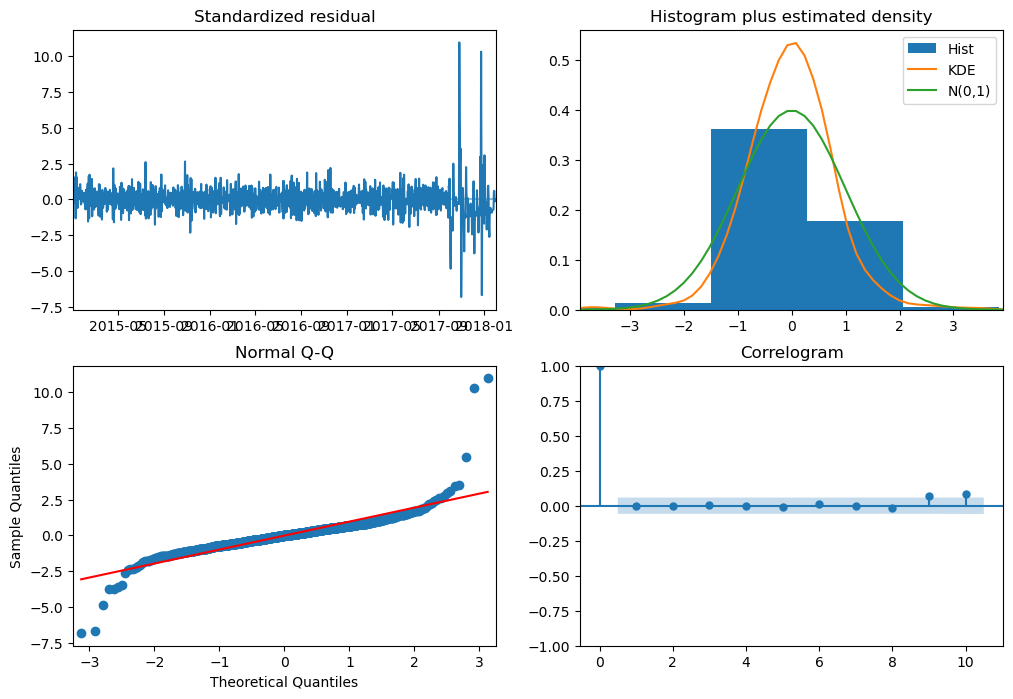

In [8]:
# Residual plots
auto_arima_model.plot_diagnostics(figsize=(12,8));

In [9]:
# Building model
sarima_model = sm.tsa.statespace.SARIMAX(df_sales, order=(1, 1, 1), seasonal_order=(1, 0, 0, 7))

# Fitting the model
sarima_model_fit = sarima_model.fit()

# Making predictions from fitted model
sarima_predict = sarima_model_fit.predict()

# Printing summary
print(sarima_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 1127
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood              -11342.314
Date:                            Sun, 27 Nov 2022   AIC                          22692.629
Time:                                    20:39:51   BIC                          22712.735
Sample:                                01-01-2015   HQIC                         22700.226
                                     - 01-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6749      0.009     74.000      0.000       0.657       0.693
ma.L1         -0.9695      0.005   

##  Graphing Actual Time Series vs Predicting Model

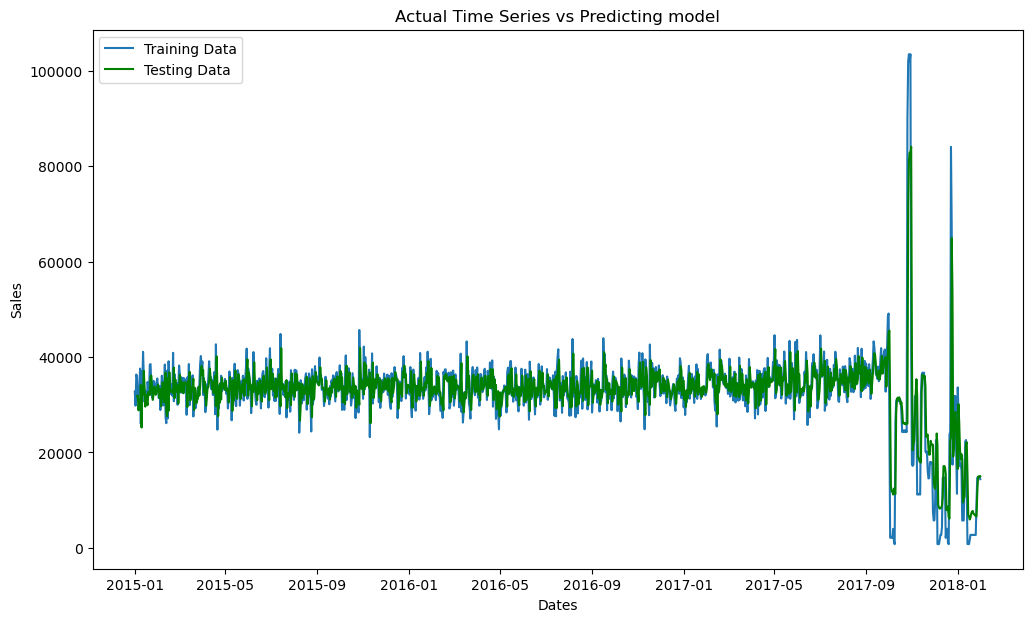

In [10]:
# Graphing actual Time Series vs Predicting output
plt.figure(figsize=(12, 7))
plt.plot(df_sales, label='Training Data')
plt.plot(sarima_predict[3:], 'green', label='Testing Data')
plt.title('Actual Time Series vs Predicting model')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Accuracy Metrics

In [11]:
# Accuracy metrics
accuracy_metrics(df_sales.Sales[1:], sarima_predict[1:])

Test MAPE: 0.272
Test RMSE: 5718.799
Test MAE: 3705.336
Test MSE: 32704663.642
Test R2: 0.580


#  SARIMA TRAIN MODEL

## Building Arima Training Model (1, 1, 5)x(1, 0, 0, 7)

In [12]:
# Splitting the data into train and test
train, test = train_test_split(df_sales, train_size=0.7, shuffle=False)

In [13]:
# Building the model
train_model = sm.tsa.statespace.SARIMAX(
    train, order=(1, 1, 5), seasonal_order=(1, 0, 0, 7))

# Fitting the model
train_model_fit = train_model.fit()

# Printing summary
print(train_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  788
Model:             SARIMAX(1, 1, 5)x(1, 0, [], 7)   Log Likelihood               -7514.353
Date:                            Sun, 27 Nov 2022   AIC                          15044.706
Time:                                    20:39:52   BIC                          15082.052
Sample:                                01-01-2015   HQIC                         15059.064
                                     - 02-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9059      1.118     -0.810      0.418      -3.098       1.286
ma.L1         -0.0496      1.119   

In [14]:
# Forecast len(test) steps ahead
train_forecast = train_model_fit.get_forecast(steps=len(test))

# Confidence Intervals of the forecasted values
train_forecast_conf_int = train_forecast.conf_int(alpha=0.05)

# Make as pandas series
train_forecast_pm = train_forecast.predicted_mean
lower_series = train_forecast_conf_int.iloc[:, 0]
upper_series = train_forecast_conf_int.iloc[:, 1]

## Graphing Training vs Testing vs Forecasting Series

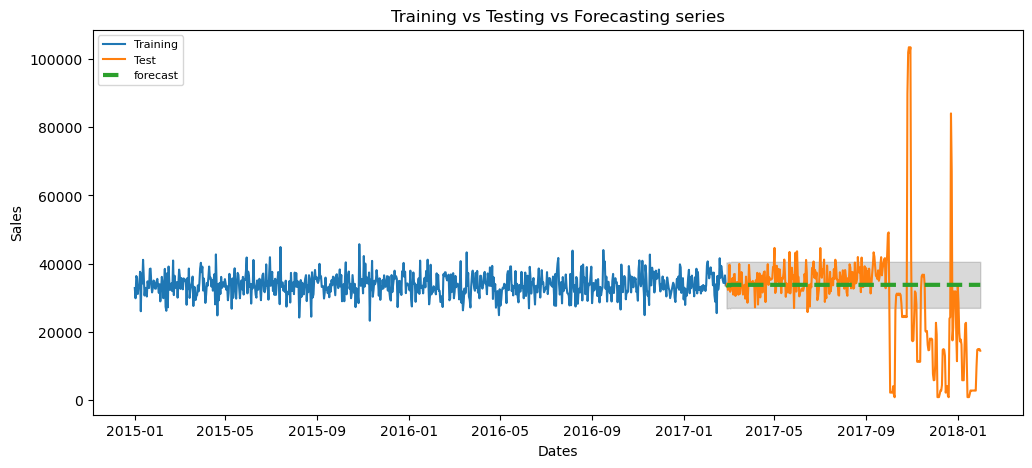

In [15]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(train_forecast_pm, linestyle='dashed', label='forecast', linewidth=3)
plt.fill_between(train_forecast_conf_int.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Training vs Testing vs Forecasting series')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Accuracy Metrics

In [16]:
# Accuracy metrics
accuracy_metrics(test.Sales, train_forecast_pm)

Test MAPE: 2.226
Test RMSE: 15406.939
Test MAE: 9420.610
Test MSE: 237373778.153
Test R2: -0.061


# FORECASTING

## Building Forecasting Model

In [17]:
# Forecast n_periods steps ahead + Confidence Intervals of the forecasted values
n_periods = len(test)

forecast, conf_int = auto_arima_model.predict(
    n_periods=n_periods, return_conf_int=True)

In [18]:
# Make series for graphing Confidence Intervals
lower_series = pd.Series(conf_int[:, 0], index=forecast.index)
upper_series = pd.Series(conf_int[:, 1], index=forecast.index)

## Graphing Time Series + Forecast + Confidence Intervals

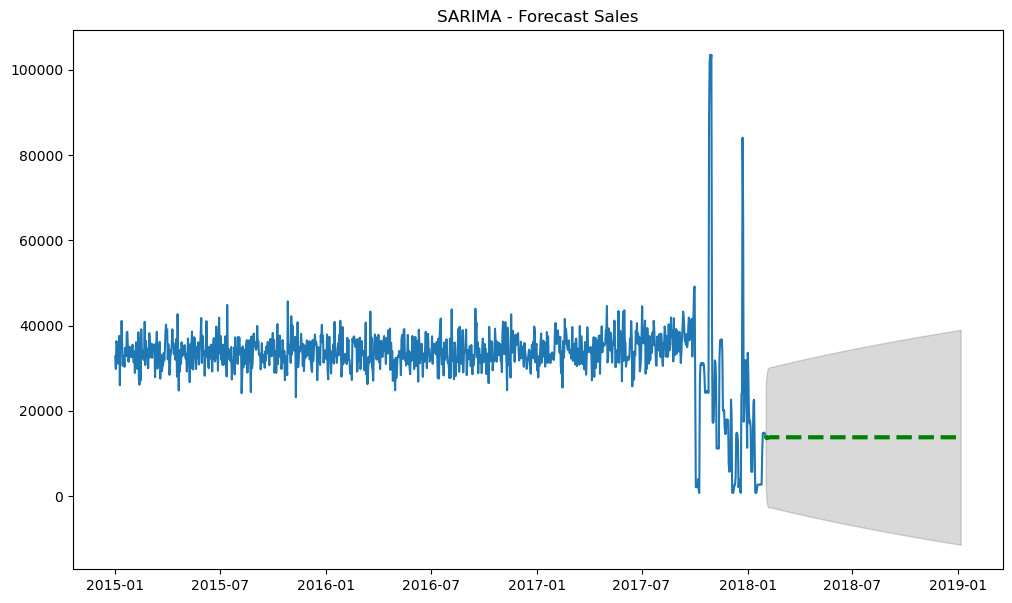

In [19]:
# Graphing Time Series + Forecast + Confidence Intervals
plt.figure(figsize=(12, 7))
plt.plot(df_sales)
plt.plot(forecast, color='g', linestyle='dashed', linewidth=3)
plt.fill_between(forecast.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast Sales")
plt.show()

#  XGBOOST

In [20]:
# Copying data to a new dataset
data = df_sales.copy()

In [21]:
# Breaking down dates at different frequency
data['Year'] = data.index.year
data['Month'] = data.index.month
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear

In [22]:
# Splitting data into train and test dataset
X, y = data.loc[:, ['Month', 'Year', 'day_of_week',
                    'day_of_year']], data.loc[:, ['Sales']]

# Splitting train and test dataframe again for Cross-Validation in a relation of 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False)

In [23]:
# Creating a regression model using XGBoost Regressor
reg = xgb.XGBRegressor(
    n_estimators=1000,  early_stopping_rounds=50, learning_rate=0.01)

# Fitting on the training dataset
reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:33259.60679	validation_1-rmse:33259.60679
[100]	validation_0-rmse:17219.89761	validation_1-rmse:17219.89761
[200]	validation_0-rmse:14920.59082	validation_1-rmse:14920.59082
[275]	validation_0-rmse:14930.02782	validation_1-rmse:14930.02782


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
# Forecasting on the test data
y_test['prediction'] = reg.predict(X_test)

In [25]:
# Merging prediction with data for the visualization
data = data.merge(y_test[['prediction']], how='left',
                  left_index=True, right_index=True)

In [26]:
# Graphing the Actual Sales Data vs Forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Sales'],
                         mode='lines',
                         name='Actual Sales Data'))
fig.add_trace(go.Scatter(x=data.index, y=data['prediction'],
                         mode='lines',
                         name='Predictions'))

# Edit the layout
fig.update_layout(title='Actual Data vs Predictions',
                  xaxis_title='Date',
                  yaxis_title='Sales in USD',
                  template='gridon')

fig.show()

In [27]:
# Accuracy metrics
accuracy_metrics(y_test.Sales, y_test.prediction)

Test MAPE: 2.009
Test RMSE: 14856.406
Test MAE: 9767.973
Test MSE: 220712788.496
Test R2: 0.013


In [28]:
# Looking at the worst predicted days
y_test['error'] = np.abs(y_test.Sales - y_test.prediction)
y_test['date'] = y_test.index.date
y_test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2017-10-28    72719.179688
2017-10-30    72415.830078
2017-10-29    72069.875000
2017-10-27    71034.392578
2017-10-26    59259.426636
2017-12-23    53094.793854
2017-12-24    36104.733887
2017-10-09    29811.438206
2017-12-05    29639.659925
2018-01-15    29485.352268
Name: error, dtype: float64